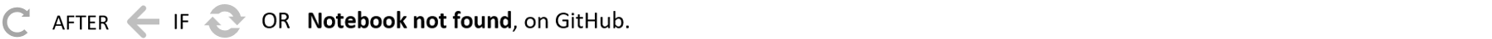

[Return to README](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/README.md#explore-the-project)

# Wikipedia Notable Life Expectancy
## Notebook 12: Linear Regression -- Interpretation Emphasis
### Contents

This notebook covers:
- `test` set preparation for modeling
- Defining independent and dependent variables for `train` and `test` sets
- Fitting a linear model
- Checking Linear Regression Assumptions
    - Absence of multicollinearity
    - Linearity
    - Independence
    - Normally distributed residuals
    - Homoscedasticity
- Checking coefficient significance (p-value)
- Final model performance evaluation
- Interpretation of model parameters
- Key insights from linear regression modeling
- Appendex: model with `age_sqrd` transformation
- Saving preprocessed `test` set to a csv file


### Instructions
Options for Running this Notebook:
1. Clone the repository:   
    - Delete the following file that is generated by this notebook:
        - [wp_life_expect_test_preproc.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_test_preproc.csv)
    - Navigate to the cloned repository in Jupyter and open the notebook to run it.
    - Refer to [Application and Package Versions](https://github.com/teresahanak/wikipedia-life-expectancy#application-and-package-versions).
2. Save the notebook and files below to the same working directory:<sup>1</sup>
    - Download the notebook:
        - Click on <kbd>Raw</kbd> above.
        - Save <kbd>Ctrl</kbd> + <kbd>S</kbd>
    - Follow the link to the csv and pickle files and click <kbd>Download</kbd>, then move files to the same directory as the notebook:
        - [wp_life_expect_train_preproc.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_train_preproc.csv)<sup>2</sup>
        - [wp_life_expect_test.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_test.csv)<sup>3</sup>
        - [region_place_dict.pkl](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/region_place_dict.pkl)<sup>4</sup>
    - In Jupyter, navigate to the directory in which the notebook and files are saved, to open and run the notebook.  
    - Refer to [Application and Package Versions](https://github.com/teresahanak/wikipedia-life-expectancy#application-and-package-versions).

    

### Data Dictionary for Loaded Version of `train` Dataset
- **num_references**:  Number of references for individual's page
- **age**: Age of individual at death in years
- **sciences**: (0 for no or 1 for yes) individual known for sciences (math, physics, chemistry, engineering, mechanics, etc.)
- **social**: (0 for no or 1 for yes) individual known for social action (philanthropy, fund-raising for social cause, founder of charity, etc.)
- **spiritual**: (0 for no or 1 for yes) individual known for spiritual association (religious association, traditional healing, self-help/motivational instructor, etc.)
- **academia_humanities**: (0 for no or 1 for yes) individual known for education activity (educator, education administration, lecturer, etc.; excludes sports-related instruction/coaching, but includes art/performing arts instruction; includes museum-related activities; classics, archeology, linguistics, anthropology, etc.)
- **business_farming**: (0 for no or 1 for yes) individual known for business or farming (includes marketing, millionaire/billionaire, manufacturing, oil/energy)
- **arts**: (0 for no or 1 for yes) individual known for arts-related activity (fine and performing arts, journalism, writing, arts administration, art patronage, collecting, etc.; gallery owners/founders are included; museum-related is excluded; stunt performers included)
- **sports**: (0 for no or 1 for yes) individual known for sports-related activity (traditional sports participation/instruction/coaching/ownership/fandom/commentator and anything competition-based, including non-physical games, such as chess; sportswriter, etc. would have dual category of arts)
- **law_enf_military_operator**: (0 for no or 1 for yes) individual known for law enforcement, military/paramilitary association/activity, or specialized equipment operation (pilot, ship captain (non-sport), radio operator, etc.); category aims to reflect individual's proximity to activity and/or weapons/equipment or decision-making that could impact life span, independent of legality of activity
- **politics_govt_law**: (0 for no or 1 for yes) individual known for political activity (official or activism), participation in legal system (lawyer, judge, etc.), nobility or inherited status; directly or by marriage; union activity is included
- **crime**: (0 for no or 1 for yes) individual known for criminal activity; category aims for "innocent until proven guilty"; includes convicted criminals (can be for a different crime); includes individuals labeled "terrorist", but generally excludes individuals awaiting trial
- **num_categories**: Total number of known for categories for individual
- **age_sqrd**: Squared transformation of age ($target^2$)
- **recip_num_references**: Multiplicative inverse transformation of num_references ($1/x$)
- **years**: Translation of year ($year - 1994$)
- **years_sqrd**:  Squared transformation of years ($x^2$)
- **region**: Ultimate location of residency as geographical region
- **prior_region**: Prior location of residency (if applicable) as geographical region
- **known_for**: known for category (equal to original category column name if sole category, or "two" if 2 categories, or "three_to_five" if 3 to 5 categories)

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# randomized data splitting
from sklearn.model_selection import train_test_split

# building regression model
import statsmodels.api as sm

# check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# check linear regression assumptions
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
# plt.rc("font", size=12)
# plt.rc("axes", titlesize=15)
# plt.rc("axes", labelsize=14)
# plt.rc("xtick", labelsize=13)
# plt.rc("ytick", labelsize=13)
# plt.rc("legend", fontsize=13)
# plt.rc("legend", fontsize=14)
# plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_train_preproc.csv), Sampling, and Checking Data Shape

In [2]:
# Reading the train set
data = pd.read_csv("wp_life_expect_train_preproc.csv")

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 77624 rows and 20 columns.


,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
0,4,73.0,0,0,1,0,0,0,0,0,0,0,1,5329.0,0.250000,8,64,Europe,No Prior Region,spiritual
1,3,90.0,1,0,0,1,0,0,0,0,0,0,2,8100.0,0.333333,13,169,North America,No Prior Region,two


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
77622,7,74.0,0,0,0,0,0,1,0,0,0,0,1,5476.0,0.142857,0,0,North America,No Prior Region,arts
77623,5,92.0,0,0,0,0,0,0,1,0,0,0,1,8464.0,0.200000,8,64,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
60916,3,71.0,0,0,0,0,0,0,0,0,1,0,1,5041.00,0.333333,23,529,Europe,No Prior Region,politics_govt_law
13605,5,72.5,0,0,1,0,0,0,0,0,0,0,1,5256.25,0.200000,19,361,Europe,No Prior Region,spiritual
37651,9,95.0,0,0,0,0,1,0,0,0,0,0,1,9025.00,0.111111,28,784,North America,No Prior Region,business_farming
24730,3,86.0,0,0,0,0,0,0,1,0,0,0,1,7396.00,0.333333,26,676,Oceania,No Prior Region,sports
47184,12,63.0,0,0,0,0,0,0,1,0,0,0,1,3969.00,0.083333,23,529,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_references             77624 non-null  int64  
 1   age                        77624 non-null  float64
 2   sciences                   77624 non-null  int64  
 3   social                     77624 non-null  int64  
 4   spiritual                  77624 non-null  int64  
 5   academia_humanities        77624 non-null  int64  
 6   business_farming           77624 non-null  int64  
 7   arts                       77624 non-null  int64  
 8   sports                     77624 non-null  int64  
 9   law_enf_military_operator  77624 non-null  int64  
 10  politics_govt_law          77624 non-null  int64  
 11  crime                      77624 non-null  int64  
 12  num_categories             77624 non-null  int64  
 13  age_sqrd                   77624 non-null  flo

<IPython.core.display.Javascript object>

#### Observations:
- With our `train` dataset loaded, we are ready for modeling.
- We have three variables that need typcasting from object to category, then one hot encoding just prior to modeling.

#### Typecasting `region`, `prior_region`, and `known_for` as Categorical

In [6]:
# Typcasting prior_region and region as categorical
df[["prior_region", "region", "known_for"]] = df[
    ["prior_region", "region", "known_for"]
].astype("category")

# Re-check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             77624 non-null  int64   
 1   age                        77624 non-null  float64 
 2   sciences                   77624 non-null  int64   
 3   social                     77624 non-null  int64   
 4   spiritual                  77624 non-null  int64   
 5   academia_humanities        77624 non-null  int64   
 6   business_farming           77624 non-null  int64   
 7   arts                       77624 non-null  int64   
 8   sports                     77624 non-null  int64   
 9   law_enf_military_operator  77624 non-null  int64   
 10  politics_govt_law          77624 non-null  int64   
 11  crime                      77624 non-null  int64   
 12  num_categories             77624 non-null  int64   
 13  age_sqrd                   7762

<IPython.core.display.Javascript object>

## Building a Linear Regression Model

### Data Preparation for Modeling
As there is no model tuning in this ordinary least squares model, we will train directly with the `train` set and check performance directly on the `test` set.  The `test` set needs these treatments first:
1. Drop non-human entries.
1. Drop `other_species` column.
1. Drop entries with `event_record_other` as sole category.
1. Drop `event_record_other` column.
1. Re-calculate `num_categories`.
1. Drop entries with age below 18.
1. Drop `place_2` values that are duplicates of `place_1`.
1. Add the following columns:  
    a. `age_sqrd`  
    b. `recip_num_references`  
    c. `years`  
    d. `years_sqrd`  
    e. `region`  
    f. `prior_region`    
    g. `known_for`  
1. Typcast categorical predictors.
1. Drop unnecessary columns.
1. Missing value treatment.

We will perform one hot encoding of remaining categorical variables on both `train` and `test` when we define independent and dependent variables, `X` and `y`.

### Test Set

#### Loading [Test Set](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_test.csv) and [region_place_dict](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/region_place_dict.pkl)

In [7]:
# Reading test.csv
test = pd.read_csv("wp_life_expect_test.csv")

# Checking shape
print(f"There are {test.shape[0]} rows and {test.shape[1]} columns in the test set.")

# Loading region_place_dict
with open("region_place_dict.pkl", "rb") as f:
    region_place_dict = pickle.load(f)

There are 19608 rows and 25 columns in the test set.


<IPython.core.display.Javascript object>

In [8]:
# Checking info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19608 entries, 0 to 19607
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        19608 non-null  int64  
 1   name                       19608 non-null  object 
 2   info                       19608 non-null  object 
 3   link                       19608 non-null  object 
 4   num_references             19608 non-null  int64  
 5   year                       19608 non-null  int64  
 6   month                      19608 non-null  object 
 7   info_parenth               6832 non-null   object 
 8   age                        19608 non-null  float64
 9   cause_of_death             6641 non-null   object 
 10  place_1                    19580 non-null  object 
 11  place_2                    1193 non-null   object 
 12  sciences                   19608 non-null  int64  
 13  social                     19608 non-null  int

<IPython.core.display.Javascript object>

#### Preprocessing Steps

In [9]:
%%time

# 1. Dropping non-human entries
rows_to_drop = test[test["other_species"] == 1].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 2. Dropping other_species column
test.drop('other_species', axis=1, inplace=True)

# 3. Dropping entries with event_record_other as sole category
rows_to_drop = test[(test['event_record_other']==1) & (test['num_categories']==1)].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 4. Dropping event_record_other column
test.drop('event_record_other', axis=1, inplace=True)

# 5. Re-calculating num_categories
cat_cols = ['sciences', 
            'social', 
            'spiritual', 
            'academia_humanities',
            'business_farming', 
            'arts', 
            'sports', 
            'law_enf_military_operator',
            'politics_govt_law',
            'crime']
test['num_categories'] = test[cat_cols].sum(axis=1)

# 6. Dropping entries with age < 18 
rows_to_drop = test[test['age'] < 18].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 7. Dropping place_2 values that are duplicates of place_1
index = [index for index in test.index if test.loc[index, 'place_2']==test.loc[index, 'place_1']]
test.loc[index, 'place_2']==None

# 8a. Creating age_sqrd column
test['age_sqrd'] = test['age']**2

# 8b. Creating recip_num_references column
test["recip_num_references"] = test["num_references"].apply(lambda x: 1 / x)

# 8c. Creating years column
test['years'] = test['year'] - 1994

# 8d. Creating years_sqrd column
test['years_sqrd'] = test['years']**2

# 8e. Creating region column
# For loop to create region column
test["region"] = None
for region, places in region_place_dict.items():
    for place in places:
        for index in test[(test["region"].isna()) & (test["place_2"].notna())].index:
            item = test.loc[index, "place_2"]
            if item:
                if item == place:
                    test.loc[index, "region"] = region
        for index in test[(test["region"].isna()) & (test["place_2"].isna())].index:
            item = test.loc[index, "place_1"]
            if item:
                if item == place:
                    test.loc[index, "region"] = region

# 8f. Creating prior_region column
# For loop to create prior_region column
test["prior_region"] = None
for region, places in region_place_dict.items():
    for place in places:
        for index in test[
            (test["place_2"].notna()) & (test["prior_region"].isna())
        ].index:
            item = test.loc[index, "place_1"]
            if item:
                if item == place:
                    test.loc[index, "prior_region"] = region            
# Adding No Prior Region category
test["prior_region"].fillna("No Prior Region", inplace=True)

# 8g. Creating known_for column
# Initializing known_for
test['known_for']=None
# List of known for columns
cat_cols = ['sciences', 
            'social', 
            'spiritual', 
            'academia_humanities',
            'business_farming', 
            'arts', 
            'sports', \
            'law_enf_military_operator',
            'politics_govt_law', 
            'crime']
# For loop to assign known_for
for index in test[test['known_for'].isna()].index:
    if test.loc[index, 'num_categories']==2:
        test.loc[index, 'known_for'] = 'two'
    elif test.loc[index, 'num_categories'] > 2:
        test.loc[index, 'known_for'] = 'three_to_five'
    else: 
        for column in cat_cols:
            if test.loc[index, column]==1:
                test.loc[index, 'known_for'] = column

# 9. Typecasting categorical predictors
test[['region', 'prior_region', 'known_for']] = test[['region', 'prior_region', 'known_for']].astype('category')

# 10. Dropping Unnecessary Columns
cols_to_drop = ['day', 
                'name', 
                'info', 
                'link', 
                'year', 
                'month',
                'info_parenth', 
                'cause_of_death', 
                'place_1', 
                'place_2',
]
test.drop(cols_to_drop, axis=1, inplace=True)

# Rechecking columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19420 entries, 0 to 19419
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             19420 non-null  int64   
 1   age                        19420 non-null  float64 
 2   sciences                   19420 non-null  int64   
 3   social                     19420 non-null  int64   
 4   spiritual                  19420 non-null  int64   
 5   academia_humanities        19420 non-null  int64   
 6   business_farming           19420 non-null  int64   
 7   arts                       19420 non-null  int64   
 8   sports                     19420 non-null  int64   
 9   law_enf_military_operator  19420 non-null  int64   
 10  politics_govt_law          19420 non-null  int64   
 11  crime                      19420 non-null  int64   
 12  num_categories             19420 non-null  int64   
 13  age_sqrd                   1942

<IPython.core.display.Javascript object>

In [10]:
# Checking a sample of rows
test.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
15888,9,83.0,0,0,0,0,0,1,0,0,0,0,1,6889.0,0.111111,13,169,Europe,No Prior Region,arts
3807,3,87.0,0,0,0,0,0,1,0,0,0,0,1,7569.0,0.333333,15,225,North America,No Prior Region,arts
12351,15,111.0,0,0,0,0,0,0,1,0,0,0,1,12321.0,0.066667,28,784,Europe,No Prior Region,sports
3272,4,80.0,0,0,0,0,0,0,1,0,0,0,1,6400.0,0.250000,26,676,Europe,No Prior Region,sports
13780,10,68.0,0,0,0,1,0,0,0,0,0,0,1,4624.0,0.100000,18,324,Oceania,No Prior Region,academia_humanities


<IPython.core.display.Javascript object>

#### Observations:
- Treatment of `test` missing values is the only remaining step.
- We will use the modes for the `known_for` groups from `train` to fill missing values for `test` to avoid data leakage.  `region` is the only column with missing values.

#### Treating Missing Values for `region` in Test

In [11]:
# Checking the starting missing values
print(f'There are {test["region"].isna().sum()} missing values.')

There are 20 missing values.


<IPython.core.display.Javascript object>

In [12]:
# For loop to impute test missing values with mode of train rows with grouped by known_for
for index in test[test["region"].isna()].index:
    group = test.loc[index, "known_for"]
    group_mode = df[df["known_for"] == group]["region"].mode().iloc[0]
    test.loc[index, "region"] = group_mode

# Treating any remaining missing region values with train region column mode
column_mode = df["region"].mode().iloc[0]
test["region"].fillna(column_mode, inplace=True)

#  Checking missing values after treatment
print(f'There are {test["region"].isna().sum()} missing values.')

# Checking region value_counts
test["region"].value_counts()

There are 0 missing values.


North America                 8050
Europe                        6132
Asia                          1637
Oceania                        979
Africa                         676
Middle East                    460
South America                  441
Mid-Cent America/Caribbean     389
Russian Federation             325
South East Asia                312
Central Asia                    19
Name: region, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- `train` and `test` are both ready for modeling.
- We will perform one hot encoding when defining our independent variables.

### Defining Independent and Dependent Variables for Train and Test Sets

In [13]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X_train, X_test = df[predictor_cols], test[predictor_cols]
y_train, y_test = df[target], test[target]


# One hot encoding independent categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Adding the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Typecasting independent variables as float
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")

# Checking shape of train and test sets
print(f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in X_train.")
print(f"There are {X_test.shape[0]} rows and {X_test.shape[1]} columns in X_test.\n")

# Checking a sample of train set
X_train.sample(2)

There are 77624 rows and 35 columns in X_train.
There are 19420 rows and 35 columns in X_test.



,const,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
58315,1.0,41.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19548,1.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [14]:
# Checking a sample of test set
X_test.sample(2)

,const,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
11251,1.0,15.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15290,1.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<IPython.core.display.Javascript object>

#### Observations:
- We are ready to build our model.
- The references levels for the categorical features are as follows:
    - `region`: Africa
    - `prior_region`: Africa
    - `known_for` academia_humanities

### Fitting a Linear Model

In [15]:
# Fitting a linear model and displaying model summary
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     239.0
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:51:29   Log-Likelihood:            -3.2067e+05
No. Observations:               77624   AIC:                         6.414e+05
Df Residuals:                   77589   BIC:                         6.417e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

### Model Performance Check

#### Function to Check Model Performance

In [16]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute and display different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### Model Performance on Train Set

In [17]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.06048,11.686253,0.094791,0.094383,19.293168


<IPython.core.display.Javascript object>

#### Model Performance on Test Set

In [18]:
# Checking model performance on validation set
print("Test Peformance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Peformance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.942114,11.614806,0.092185,0.090546,18.972156


<IPython.core.display.Javascript object>

### Observations:
- The train and test $R^2$ are at 0.095 and 0.092, respectively, indicating that the model explains 9.5% of total variation in the train set and 9.2% of total variation in the test set.  It is a very small amount, but it is not nothing.
- RMSE values for the two sets are also comparable, at ~15.
- The comparable results between the two sets show that the model is not overfitting.
- MAE indicates that our current model is able to predict age of reported deceased notable Wikipedia individuals within a mean error of ~11.6 years on the test set.
- MAPE of ~19% on the test set means that we are able to predict within ~19% of the reported age, in years, on average.

### Checking Linear Regression Assumptions

### Test for Multicollinearity

#### Function to check VIF of Each Independent Variable

In [19]:
# Define a function to check and display VIF of each independent variable
def checking_vif(predictors):
    """
    Takes input dependent variables predictors and returns
    a dataframe of variable name and VIF
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

#### VIF

In [20]:
# Checking vif
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,386.105106
18,prior_region_No Prior Region,16.896349
15,prior_region_Europe,10.310022
8,region_North America,7.831228
24,known_for_arts,7.488706
5,region_Europe,7.115664
32,known_for_sports,5.416164
28,known_for_politics_govt_law,5.004680
34,known_for_two,4.389265
3,region_Asia,3.186025


<IPython.core.display.Javascript object>

#### Observations:
- The majority of predictors have low VIF (< 5), which is good.
- The higher VIF value belonging to the constant is accepable, as the constant is necessary for the residuals to have zero mean to avoid bias.
- We will proceed by checking the impact on performance of dropping each of the high VIF columns, and drop the column with the least impact on performance and re-evaluate VIF.  
- This process is iterative until we have all low VIF columns.
- By dropping dummy variables, we are adding the dropped class to the reference class.

#### Function to Treat Multicollinearity

In [21]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [22]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,prior_region_No Prior Region,0.094284,15.064794
1,known_for_politics_govt_law,0.093746,15.069270
2,prior_region_Europe,0.093657,15.070009
3,known_for_arts,0.090750,15.094158
4,known_for_sports,0.084814,15.143346
5,region_Europe,0.082365,15.163595
6,region_North America,0.081412,15.171471


<IPython.core.display.Javascript object>

#### Observations:
- Of the high VIF columns, `prior_region_No Prior Region` has the least impact on performance when dropped, so we will drop it.

#### Dropping `prior_region_No Prior Region`

In [23]:
# Dropping prior_region_No Prior Region column
col_to_drop = "prior_region_No Prior Region"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,67.893731
8,region_North America,7.828353
23,known_for_arts,7.488383
5,region_Europe,7.114586
31,known_for_sports,5.416152
27,known_for_politics_govt_law,5.004673
33,known_for_two,4.389195
3,region_Asia,3.184403
28,known_for_sciences,2.683464
9,region_Oceania,2.310204


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [24]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,known_for_politics_govt_law,0.093635,15.070193
1,known_for_arts,0.090631,15.095147
2,known_for_sports,0.084707,15.144231
3,region_Europe,0.082223,15.164767
4,region_North America,0.081249,15.172819


<IPython.core.display.Javascript object>

#### Observations:
- Of the remaining high VIF columns, `known_for_politics_govt_law` has the least impact on performance when dropped, so we will drop it.

#### Dropping `known_for_politics_govt_law`

In [25]:
# Dropping known_for_politics_govt_law column
col_to_drop = "known_for_politics_govt_law"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,39.616726
8,region_North America,7.805539
5,region_Europe,7.084286
3,region_Asia,3.181441
9,region_Oceania,2.308380
23,known_for_arts,1.853725
7,region_Middle East,1.725259
11,region_South America,1.661597
30,known_for_sports,1.627608
6,region_Mid-Cent America/Caribbean,1.551307


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [26]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,region_Europe,0.081149,15.173638
1,region_North America,0.080241,15.181134


<IPython.core.display.Javascript object>

#### Observations:
- With the model already so limited in its predictive capacity, the drop in Adjusted $R^2$ from 0.094 to 0.081, with dropping `region_Europe` is large.
- Let us try combining classes to see if we can retain more information and still accomplish no multicollinearity.

#### Combining `region_Europe` and `region_North America`

In [27]:
# Initializing the new combined column
X_train["region_Europe_OR_North America"] = 0
X_test["region_Europe_OR_North America"] = 0

# Assigning new combined column value for train set
index = [
    index
    for index in X_train.index
    if X_train.loc[index, "region_Europe"] == 1
    or X_train.loc[index, "region_North America"] == 1
]
X_train.loc[index, "region_Europe_OR_North America"] = 1.0

# Assigning new combined column value for test set
index = [
    index
    for index in X_test.index
    if X_test.loc[index, "region_Europe"] == 1
    or X_test.loc[index, "region_North America"] == 1
]
X_test.loc[index, "region_Europe_OR_North America"] = 1.0

# Dropping source columns
X_train.drop(["region_Europe", "region_North America"], axis=1, inplace=True)
X_test.drop(["region_Europe", "region_North America"], axis=1, inplace=True)

# Checking a sample
X_train.sample()

,const,num_references,years,region_Asia,region_Central Asia,region_Mid-Cent America/Caribbean,region_Middle East,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two,region_Europe_OR_North America
46304,1.0,16.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<IPython.core.display.Javascript object>

#### Checking VIF

In [28]:
# Checking VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,39.602218
31,region_Europe_OR_North America,6.117480
3,region_Asia,3.181424
7,region_Oceania,2.308380
21,known_for_arts,1.853016
6,region_Middle East,1.725256
9,region_South America,1.661592
28,known_for_sports,1.622269
5,region_Mid-Cent America/Caribbean,1.551307
8,region_Russian Federation,1.506426


<IPython.core.display.Javascript object>

#### Observations:
- We still have the one column with VIF > 5.
- Let us try adding `region_Asia` to our new combined class.

#### Combining `region_Europe_OR_North America` and `region_Asia`

In [29]:
# Initializing the new combined column
X_train["region_Europe_OR_North_America_OR_Asia"] = 0
X_test["region_Europe_OR_North_America_OR_Asia"] = 0

# Assigning new combined column value for train set
index = [
    index
    for index in X_train.index
    if X_train.loc[index, "region_Europe_OR_North America"] == 1
    or X_train.loc[index, "region_Asia"] == 1
]
X_train.loc[index, "region_Europe_OR_North_America_OR_Asia"] = 1.0

# Assigning new combined column value for test set
index = [
    index
    for index in X_test.index
    if X_test.loc[index, "region_Europe_OR_North America"] == 1
    or X_test.loc[index, "region_Asia"] == 1
]
X_test.loc[index, "region_Europe_OR_North_America_OR_Asia"] = 1.0

# Dropping source columns
X_train.drop(["region_Europe_OR_North America", "region_Asia"], axis=1, inplace=True)
X_test.drop(["region_Europe_OR_North America", "region_Asia"], axis=1, inplace=True)

# Checking a sample
X_train.sample()

,const,num_references,years,region_Central Asia,region_Mid-Cent America/Caribbean,region_Middle East,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two,region_Europe_OR_North_America_OR_Asia
32597,1.0,14.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<IPython.core.display.Javascript object>

#### Checking VIF

In [30]:
# Checking VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,39.599760
30,region_Europe_OR_North_America_OR_Asia,4.673069
6,region_Oceania,2.308126
20,known_for_arts,1.850484
5,region_Middle East,1.725249
8,region_South America,1.661547
27,known_for_sports,1.606775
4,region_Mid-Cent America/Caribbean,1.551272
7,region_Russian Federation,1.506364
29,known_for_two,1.471919


<IPython.core.display.Javascript object>

#### Observations:
- `prior_region_No Prior Region` and `known_for_politics_govt_law` columns were dropped and `region_Europe`, `region_North America`, and `region_Asia` classes were combined and their source columns dropped.
- There are no remaining high VIF columns, excluding the constant, which we will retain.
- **So, the assumption of independence of predictor variables (absence of multicollinearity) is satisfied.**
- The updated reference levels for each feature are as follows:
    - `region`: Africa
    - `prior_region`: Africa OR No Prior Region
    - `known_for`: academia_humanities OR politics_govt_law
- Next, we will fit our second model, then drop columns with high p-values for their coefficients.

#### Fitting Second Model

In [31]:
# Fitting a linear model and displaying model summary
olsmodel2 = sm.OLS(y_train, X_train).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     256.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:51:50   Log-Likelihood:            -3.2086e+05
No. Observations:               77624   AIC:                         6.418e+05
Df Residuals:                   77593   BIC:                         6.421e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### Checking Features with High Coefficient p-values

In [32]:
## Loop for Dropping variables with high coefficient p-values one at a time excluding constant and dummy variables
# Current model predictors
train_predictors = X_train

# initial list of all independent variable columns including constant
cols = train_predictors.columns.to_list()

# initial empty list of independent variables to exclude
excluded_features = []

# setting an initial max p_value
max_p_value = 1

for i in range(len(cols)):
    # defining the train set
    x_train_aux = train_predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues[cols]
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        excluded_features.append(feature_with_p_max)
    else:
        break

print(f"Features with high p-values to exclude: {excluded_features}")

Features with high p-values to exclude: ['known_for_business_farming', 'known_for_social', 'prior_region_South America', 'prior_region_Central Asia', 'prior_region_Mid-Cent America/Caribbean', 'prior_region_North America', 'prior_region_Oceania', 'region_Central Asia']


<IPython.core.display.Javascript object>

#### Dropping `excluded_features` with High p-values

In [33]:
# Dropping excluded_features
X_train.drop(excluded_features, axis=1, inplace=True)
X_test.drop(excluded_features, axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Observations:
- We dropped several columns with high p-values.
- The updated reference levels for each feature are as follows:
    - `region`: Africa OR Central Asia
    - `prior_region`: Africa, No Prior Region, South America, Central Asia, Mid-Cent America/Caribbean, North America, OR Oceania
    - `known_for`: academia_humanities, politics_govt_law, business_farming, OR social

#### Fitting Third Model

In [34]:
# fitting third model and printing summary
olsmodel3 = sm.OLS(y_train, X_train).fit()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     349.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:51:52   Log-Likelihood:            -3.2087e+05
No. Observations:               77624   AIC:                         6.418e+05
Df Residuals:                   77601   BIC:                         6.420e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### Observations:
- Adjusted $R^2$ has held at 0.090 after dropping the high p-value columns, indicating that the dropped variables were not affecting the model much at all.
- **Now, no other feature, including the constant, has a p-value greater than 0.05, so we will consider these features as the final set of predictor variables and *olsmodel3* as the final model.**
- *olsmodel3* has 22 predictors plut the constant term.
- We will now check the remaining assumptions for linear regression.

### Test for Linearity and Independence

#### Dataframe of Actual, Fitted, and Residual Values

In [35]:
# dataframe of actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,73.0,81.618993,-8.618993
1,90.0,80.127925,9.872075
2,77.0,72.363460,4.636540
3,84.0,75.731594,8.268406
4,64.0,71.066091,-7.066091


<IPython.core.display.Javascript object>

#### Plot of Fitted Values vs Residuals

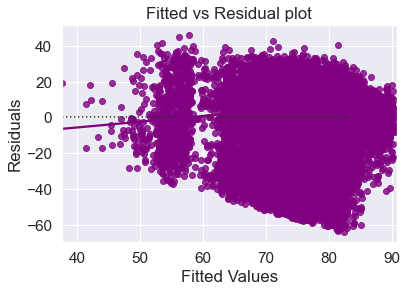

<IPython.core.display.Javascript object>

In [36]:
# plot of fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation:
- There is not a definitive pattern in the residuals with change in predicted age.
- Predictions for age of ~60 are underrepresented, which is interesting.  As we suspected in EDA, the set may represent combined samples of two populations.
- The most apparent issue with the residual plot is that the residuals are not centered around zero, so not normally distributed.  We will confirm this by visualizing the histogram and Q-Q plots.
- **As there is not a definitive pattern, so we will consider the assumptions of independence and linearity sufficiently met to allow interpretation of coefficients.**
- We will also be testing further for homoscedasticity, via the Goldfeld-Quandt test.

### Tests for Normality

#### Histogram

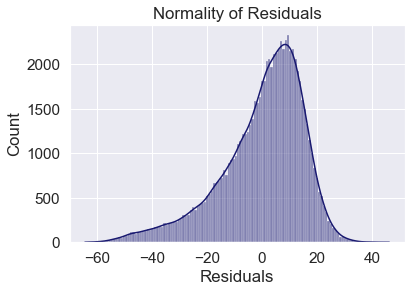

<IPython.core.display.Javascript object>

In [37]:
# Histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

#### Q-Q plot

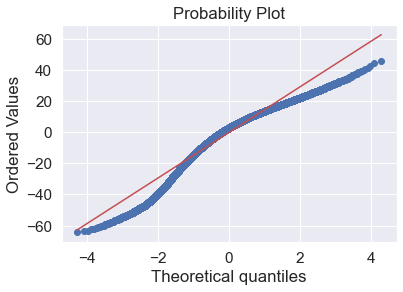

<IPython.core.display.Javascript object>

In [38]:
# checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
- The histogram of the residuals does have an overall bell shape, but the distribution is left skewed.
- The Q-Q plot confirms that the residuals have a left skewed distribution.
- To meet the assumption of normally distributed residuals, we would need to apply a transformation to the target `age`.  The squared transformation for `age` is effective, but makes interpretation of the coefficients intractable.
- **The assumption of normally distributed residuals is not met, but we will proceed in order to demonstrate the process of coefficient interpretation.**
- An iteration of modeling with the same predictors with the target transformed, `age_sqrd`, follows for comparison, in the Appendix of this notebook.

### Test for Homoscedasticity

#### Goldfeld-Quandt Test

In [39]:
# Goldfeld-quandt test
name = ["F statistic", "p-value"]
gq_test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, gq_test)

[('F statistic', 1.0028631173372107), ('p-value', 0.3891482541551972)]

<IPython.core.display.Javascript object>

#### Observations:
- Since p-value is > 0.05, the residuals are homoscedastic.
- **The assumption of homoscedasticity is met.**
- With all of the assumptions of linear regression addressed, we can examine the final model.

## Final Model Summary

### *olsmodel3* summary

In [40]:
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     349.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:53:54   Log-Likelihood:            -3.2087e+05
No. Observations:               77624   AIC:                         6.418e+05
Df Residuals:                   77601   BIC:                         6.420e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### Final Model Performance on Train Set

In [41]:
# Checking final model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel3, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.099392,11.717258,0.090108,0.089838,19.353536


<IPython.core.display.Javascript object>

#### Final Model Performance on Validation Set

In [42]:
# Checking final model performance on test set
print("Testing Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel3, X_test, y_test)
olsmodel_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.978239,11.641486,0.087791,0.086709,19.030094


<IPython.core.display.Javascript object>

#### Observations:
- With $R^2$ of only 0.09 on the train set, our model has very limited predictive capacity.  The predictors are only able to explain ~9% of the variation from the mean actual age.
- Test $R^2$ of 0.088 indicates that the model is not overfitting, as it compares to that of the test set along with other measures.
- MAE of 11.6 suggests that the model can predict within a mean error of ~11.6 years on the test data.
- MAPE of ~19% on the test data means that we aree able to predict within ~19% of age, on average.

## Interpreting *olsmodel3* Parameters

#### Interpreting Final Features Coefficients (p-values < 0.05)

In [43]:
# creating a dataframe of features, coefficients, and interpretations
interp_df = pd.DataFrame(olsmodel3.params).iloc[1:, :].reset_index()
interp_df.rename({"index": "Feature", 0: "Coefficient"}, axis=1, inplace=True)

# title for interpretation column
title = "Impact on Age (all else constant; compared to reference levels for category)"

# for loop to indicate how used price % changes in relation to feature dependent on feature type/transformation
for i, feature in enumerate(interp_df["Feature"]):
    # for predictors with negative coefficients
    if interp_df.loc[i, "Coefficient"] < 0:
        magnitude = np.abs(interp_df.loc[i, "Coefficient"])
        if feature.startswith("prior"):
            interp_df.loc[
                i, title
            ] = f'{round(magnitude, 1)} year decrease in age with prior region {feature.removeprefix("prior_region_")}'
        elif feature.startswith("known"):
            interp_df.loc[
                i, title
            ] = f'{round(magnitude, 1)} year decrease in age if known for {feature.removeprefix("known_for_")}'
        else:
            interp_df.loc[
                i, title
            ] = f"{round(magnitude * 10, 1)} year decrease in age with 10 unit increase in {feature}"

    # for predictors with positive coefficients
    else:
        magnitude = interp_df.loc[i, "Coefficient"]
        if feature.startswith("region"):
            interp_df.loc[
                i, title
            ] = f'{round(magnitude, 1)} year increase in age with region {feature.removeprefix("region_")}'
        elif feature.startswith("prior"):
            interp_df.loc[
                i, title
            ] = f'{round(magnitude, 1)} year increase in age with prior region {feature.removeprefix("prior_region_")}'
        elif feature.startswith("known"):
            interp_df.loc[
                i, title
            ] = f'{round(magnitude, 1)} year increase in age if known for {feature.removeprefix("known_for_")}'
        else:
            interp_df.loc[
                i, title
            ] = f"{round(magnitude, 1)} year increase in age with unit increase in {feature}"


pd.set_option("max_colwidth", 100)
interp_df

,Feature,Coefficient,Impact on Age (all else constant; compared to reference levels for category)
0,num_references,-0.035044,0.4 year decrease in age with 10 unit increase in num_references
1,years,0.192866,0.2 year increase in age with unit increase in years
2,region_Mid-Cent America/Caribbean,5.084445,5.1 year increase in age with region Mid-Cent America/Caribbean
3,region_Middle East,4.129332,4.1 year increase in age with region Middle East
4,region_Oceania,9.364140,9.4 year increase in age with region Oceania
5,region_Russian Federation,4.217627,4.2 year increase in age with region Russian Federation
6,region_South America,6.046767,6.0 year increase in age with region South America
7,region_South East Asia,3.346699,3.3 year increase in age with region South East Asia
8,prior_region_Asia,-1.626941,1.6 year decrease in age with prior region Asia
9,prior_region_Europe,5.409605,5.4 year increase in age with prior region Europe


<IPython.core.display.Javascript object>

#### Observations:
- Here, we see the impact of each predictor in the model on the target `age` (i.e., life span) given all other values are held constant and relative to the feature's reference class, for categorical features.

## Key Findings from Linear Regression Modeling
### Final Model and Performance
- The final model, *olsmodel3* has 22 predictive terms, plus a constant that is included to avoid bias, but not otherwise used here for interpretation.
- All of the terms are statistically significant for interpretation.
- The model explains ~8.8% of the variation in life span.
- On the test data, the model can predict life span of an individual in Wikipedia's Notable Deaths\* +/-11.6 years on average, which is equivalent to within ~19%.  

### Interpretation of Key Predictors in the Model (assuming all else is held constant)
- The assumptions of linear regression are sufficiently met, with the exception of normal distribution of residuals.  A squared transformation of the target, `age`, addresses this violation (see Appendix), but considerably complicates interpretation, so was not included in the model.
- To demonstrate the interpretation process, we proceeded with interpetation without that assumption met.
- The reference levels of categorical predictors are as follows:
    - `region`: Africa OR Central Asia
    - `prior_region`: Africa, No Prior Region, South America, Central Asia, Mid-Cent America/Caribbean, North America, OR Oceania
    - `known_for`: academia_humanities, politics_govt_law, business_farming, OR social
- An increase in number of references by 10 references is associated with 0.4 years decrease in life span.  
- For each year later in which death occurred, there is an associated 0.2 year increase in life span.
- All region class predictors are associated with increased life span from the reference class.  Living in Europe, North America, Asia, or Oceania is associated with the highest increase in life span, of 9-10 years.
- Conversely, being previously from Central Asia is associated with a 10.9 year decrease in life span.
- Being known for a spiritual life is associated with the highest increase in life span, of 3.5 years.
- Not surprisingly, being known for criminal activities, is associated with a very large negative impact on life span, of 23.5 years.

### Insights
- A proposed benchmark $R^2$ for models in the social sciences (i.e., the domain of this project), is above 0.35.<sup>5</sup>  So, $R^2$ of 0.088 is still quite low even for the domain.  However, given the relatively few predictive features (year of death, number of references as a proxy of notability, place of residency, place of prior residency (if any), and for what in life the person was known), ~9% explained variation of life span is not unreasonable.
- There are findings that make intuitive sense, such as crime having a dramatic negative impact on life span.  Likewise, we would expect life span to increase with the year of death consistent with general trends in life span.
- Number of references is interesting because life span goes down with more references.  One explanation is that the unexpected death of a younger person tends to draw more attention.  The individual thereby makes more news, which generates more potential references and increased editing activity by Wikipedia contributors.  Similarly, criminal activity draws more attention and is associated with shorter lifespan.
- Also, not surprising, is that spiritual living is associated with the longest lifespan.  The masters and leaders of many spiritual and healing traditions are in this category.
- As for residency, the largest increase in lifespan is associated with regions with predominantly developed countries, which we would expect.  The shortest lifespan is associated with Africa or Central Asia, where there have been areas of unrest or that are not as developed.

### Next Steps
- We know that our dataset is limited in its potential for modeling, but that does not mean we are unable to improve on our predictions.
- It is time sign off on our linear regression model and move on to other algorithms.
- For use in the next notebook, we save the preprocessed test set to a csv file.

\* Human entries age 18 and older were included for deaths reported from January, 1994 through June 9, 2022. Individuals have at least 3 references and are known for more than an event by which they were passively impacted (e.g., victim of a crime), or other passive characteristic (e.g., tallest person).

## Saving Preprocessed `test` to [wp_life_expect_test_preproc.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_test_preproc.csv)

In [44]:
# Saving test set to csv
test.to_csv("wp_life_expect_test_preproc.csv", index=False)

<IPython.core.display.Javascript object>

________________________
1. Krishna and Ethan, "How to download a Jupyter Notebook from GitHub?" *Stack Exchange, Data Science* (blog), last modified 21 September 2021, https://datascience.stackexchange.com/questions/35555/how-to-download-a-jupyter-notebook-from-GitHub.
2. "Deaths in January 1994" through "Deaths in June 2022" (through June 9, 2022) and each listed individual's page, Wikipedia, accessed (scraped) June 9-10, 2022, https://en.wikipedia.org/wiki/Deaths_in_January_1994; "A List of Nationalities," WorldAtlas, Victor Kiprop, last modified May 14, 2018, https://www.worldatlas.com/articles/what-is-a-demonym-a-list-of-nationalities.html.;  Marijn Huizendveld, *List of nationalities*.  (GitHub, accessed June 17, 2022), https://gist.github.com/marijn/274449#file-nationalities-txt; "Map of the World's Continents and Regions," Nations Online Project, accessed June 29, 2022, https://www.nationsonline.org/oneworld/small_continents_map.htm.
3. "Deaths in January 1994" through "Deaths in June 2022" (through June 9, 2022) and each listed individual's page, Wikipedia, accessed (scraped) June 9-10, 2022, https://en.wikipedia.org/wiki/Deaths_in_January_1994; "A List of Nationalities," WorldAtlas, Victor Kiprop, last modified May 14, 2018, https://www.worldatlas.com/articles/what-is-a-demonym-a-list-of-nationalities.html.;  Marijn Huizendveld, *List of nationalities*.  (GitHub, accessed June 17, 2022), https://gist.github.com/marijn/274449#file-nationalities-txt.
4. "Map of the World's Continents and Regions," Nations Online Project, accessed June 29, 2022, https://www.nationsonline.org/oneworld/small_continents_map.htm.
5. "Linear Correlation," DePaul University, accessed November 1, 2022, https://condor.depaul.edu/sjost/it223/documents/correlation.htm.

# [Proceed to Modeling for Regression -- Prediction Emphasis](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_models_thanak_2022_10_14.ipynb)

[Return to README](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/README.md#explore-the-project)

# Appendix: Model with `age_sqrd` ($target^2$)Transformation

### (Appendix) Defining Independent and Dependent Variables for Train and Test Sets

In [45]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age_sqrd"

# Defining independent and dependent variables
X_train_app, X_test_app = df[predictor_cols], test[predictor_cols]
y_train_app, y_test_app = df[target], test[target]


# One hot encoding independent categorical features
X_train_app = pd.get_dummies(X_train_app, drop_first=True)
X_test_app = pd.get_dummies(X_test_app, drop_first=True)

# Adding the intercept
X_train_app = sm.add_constant(X_train_app)
X_test_app = sm.add_constant(X_test_app)

# Typecasting independent variables as float
X_train_app = X_train_app.astype("float64")
X_test_app = X_test_app.astype("float64")

# Checking shape of train and test sets
print(
    f"There are {X_train_app.shape[0]} rows and {X_train_app.shape[1]} columns in X_train_app."
)
print(
    f"There are {X_test_app.shape[0]} rows and {X_test_app.shape[1]} columns in X_test_app.\n"
)

# Checking a sample of train set
X_train_app.sample(2)

There are 77624 rows and 35 columns in X_train_app.
There are 19420 rows and 35 columns in X_test_app.



,const,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
31289,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15508,1.0,6.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

In [46]:
# Checking a sample of test set
X_test_app.sample(2)

,const,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
16698,1.0,6.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13661,1.0,5.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

###  (Appendix) Fitting a Linear Model

In [47]:
# Fitting a linear model and displaying model summary
app_olsmodel = sm.OLS(y_train_app, X_train_app).fit()
print(app_olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     231.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:53:55   Log-Likelihood:            -7.0340e+05
No. Observations:               77624   AIC:                         1.407e+06
Df Residuals:                   77589   BIC:                         1.407e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

###  (Appendix) Model Performance Check

####  (Appendix) Function to Check Model Performance

In [48]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute and display different metrics to check performance of a regression model
# with conversion back to original scale for RMSE, MAE, and MAPE for ease of explainability
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(
        mean_squared_error(np.sqrt(target), np.sqrt(pred))
    )  # to compute RMSE (original scale)
    mae = mean_absolute_error(
        np.sqrt(target), np.sqrt(pred)
    )  # to compute MAE (original scale)
    mape = mape_score(
        np.sqrt(target), np.sqrt(pred)
    )  # to compute MAPE (original scale)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

####  (Appendix) Model Performance on Train Set (*original scale for RMSE, MAE, MAPE*)

In [49]:
# Checking model performance on train set
print("Training Performance\n")
app_olsmodel_train_perf = model_performance_regression(
    app_olsmodel, X_train_app, y_train_app
)
app_olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.141027,11.480957,0.092013,0.091604,19.459791


<IPython.core.display.Javascript object>

####  (Appendix) Model Performance on Test Set (*original scale for RMSE, MAE, MAPE*)

In [50]:
# Checking model performance on validation set
print("Test Peformance\n")
app_olsmodel_test_perf = model_performance_regression(
    app_olsmodel, X_test_app, y_test_app
)
app_olsmodel_test_perf

Test Peformance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.011811,11.415906,0.088797,0.087151,19.135809


<IPython.core.display.Javascript object>

###  (Appendix) Checking Linear Regression Assumptions

###  (Appendix) Test for Multicollinearity

####  (Appendix) Function to check VIF of Each Independent Variable

In [51]:
# Define a function to check and display VIF of each independent variable
def checking_vif(predictors):
    """
    Takes input dependent variables predictors and returns
    a dataframe of variable name and VIF
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

####  (Appendix) VIF

In [52]:
# Checking vif
vif = checking_vif(X_train_app).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,386.105106
18,prior_region_No Prior Region,16.896349
15,prior_region_Europe,10.310022
8,region_North America,7.831228
24,known_for_arts,7.488706
5,region_Europe,7.115664
32,known_for_sports,5.416164
28,known_for_politics_govt_law,5.004680
34,known_for_two,4.389265
3,region_Asia,3.186025


<IPython.core.display.Javascript object>

####  (Appendix) Function to Treat Multicollinearity

In [53]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

####  (Appendix) Checking Impact of Dropping Columns on Model Performance

In [54]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train_app, y_train_app, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,prior_region_No Prior Region,0.091517,2085.923398
1,known_for_politics_govt_law,0.090854,2086.684909
2,prior_region_Europe,0.090831,2086.711189
3,known_for_arts,0.087971,2089.990269
4,known_for_sports,0.082774,2095.936260
5,region_Europe,0.080126,2098.959494
6,region_North America,0.078905,2100.352461


<IPython.core.display.Javascript object>

####  (Appendix) Dropping `prior_region_No Prior Region`

In [55]:
# Dropping prior_region_No Prior Region column
col_to_drop = "prior_region_No Prior Region"
X_train_app = X_train_app.drop(col_to_drop, axis=1)
X_test_app = X_test_app.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train_app).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,67.893731
8,region_North America,7.828353
23,known_for_arts,7.488383
5,region_Europe,7.114586
31,known_for_sports,5.416152
27,known_for_politics_govt_law,5.004673
33,known_for_two,4.389195
3,region_Asia,3.184403
28,known_for_sciences,2.683464
9,region_Oceania,2.310204


<IPython.core.display.Javascript object>

####  (Appendix) Checking Impact of Dropping Columns on Model Performance

In [56]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train_app, y_train_app, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,known_for_politics_govt_law,0.090754,2086.798693
1,known_for_arts,0.087864,2090.112755
2,known_for_sports,0.082679,2096.045266
3,region_Europe,0.079999,2099.105267
4,region_North America,0.078757,2100.521626


<IPython.core.display.Javascript object>

####  (Appendix) Dropping `known_for_politics_govt_law`

In [57]:
# Dropping known_for_politics_govt_law column
col_to_drop = "known_for_politics_govt_law"
X_train_app = X_train_app.drop(col_to_drop, axis=1)
X_test_app = X_test_app.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train_app).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,39.616726
8,region_North America,7.805539
5,region_Europe,7.084286
3,region_Asia,3.181441
9,region_Oceania,2.308380
23,known_for_arts,1.853725
7,region_Middle East,1.725259
11,region_South America,1.661597
30,known_for_sports,1.627608
6,region_Mid-Cent America/Caribbean,1.551307


<IPython.core.display.Javascript object>

####  (Appendix) Checking Impact of Dropping Columns on Model Performance

In [58]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train_app, y_train_app, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,region_Europe,0.078792,2100.481458
1,region_North America,0.077614,2101.823761


<IPython.core.display.Javascript object>

####  (Appendix) Dropping `region_Europe`

In [59]:
# Dropping region_Europe column
col_to_drop = "region_Europe"
X_train_app = X_train_app.drop(col_to_drop, axis=1)
X_test_app = X_test_app.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train_app).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,13.799315
22,known_for_arts,1.839277
29,known_for_sports,1.618115
31,known_for_two,1.471178
7,region_North America,1.299965
26,known_for_sciences,1.251142
3,region_Asia,1.154850
25,known_for_law_enf_military_operator,1.136672
28,known_for_spiritual,1.092385
8,region_Oceania,1.092028


<IPython.core.display.Javascript object>

####  (Appendix) Fitting Second Model

In [60]:
# Fitting a linear model and displaying model summary
app_olsmodel2 = sm.OLS(y_train_app, X_train_app).fit()
print(app_olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     215.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:54:07   Log-Likelihood:            -7.0395e+05
No. Observations:               77624   AIC:                         1.408e+06
Df Residuals:                   77592   BIC:                         1.408e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

####  (Appendix) Checking Features with High Coefficient p-values

In [61]:
## Loop for Dropping variables with high coefficient p-values one at a time excluding constant and dummy variables
# Current model predictors
train_predictors = X_train_app

# initial list of all independent variable columns including constant
cols = train_predictors.columns.to_list()

# initial empty list of independent variables to exclude
excluded_features = []

# setting an initial max p_value
max_p_value = 1

for i in range(len(cols)):
    # defining the train set
    X_train_app_aux = train_predictors[cols]

    # fitting the model
    model = sm.OLS(y_train_app, X_train_app_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues[cols]
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        excluded_features.append(feature_with_p_max)
    else:
        break

print(f"Features with high p-values to exclude: {excluded_features}")

Features with high p-values to exclude: ['prior_region_South America', 'region_Oceania', 'prior_region_Central Asia', 'known_for_social', 'prior_region_Mid-Cent America/Caribbean', 'prior_region_North America', 'prior_region_Oceania', 'prior_region_Asia', 'known_for_business_farming']


<IPython.core.display.Javascript object>

####  (Appendix) Dropping `excluded_features` with High p-values

In [62]:
# Dropping excluded_features
X_train_app.drop(excluded_features, axis=1, inplace=True)
X_test_app.drop(excluded_features, axis=1, inplace=True)

<IPython.core.display.Javascript object>

####  (Appendix) Fitting Third Model

In [63]:
# fitting third model and printing summary
app_olsmodel3 = sm.OLS(y_train_app, X_train_app).fit()
print(app_olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     302.8
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:54:08   Log-Likelihood:            -7.0395e+05
No. Observations:               77624   AIC:                         1.408e+06
Df Residuals:                   77601   BIC:                         1.408e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

###  (Appendix) Test for Linearity and Independence

####  (Appendix) Dataframe of Actual, Fitted, and Residual Values

In [64]:
# dataframe of actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train_app  # actual values
df_pred["Fitted Values"] = app_olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = app_olsmodel3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,5329.0,6668.974504,-1339.974504
1,8100.0,6654.485882,1445.514118
2,5929.0,5440.245360,488.754640
3,7056.0,5614.987314,1441.012686
4,4096.0,5432.928899,-1336.928899


<IPython.core.display.Javascript object>

####  (Appendix) Plot of Fitted Values vs Residuals

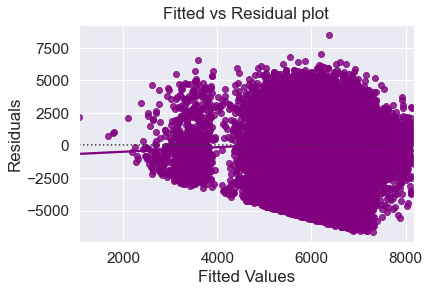

<IPython.core.display.Javascript object>

In [65]:
# plot of fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

###  (Appendix) Tests for Normality

####  (Appendix) Histogram

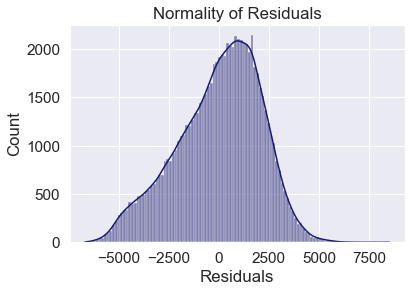

<IPython.core.display.Javascript object>

In [66]:
# Histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

#### (Appendix) Q-Q plot

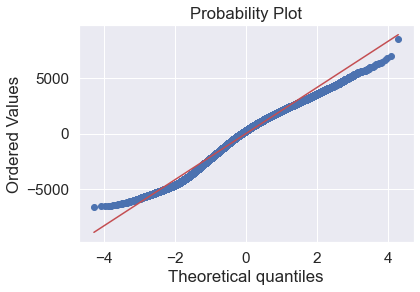

<IPython.core.display.Javascript object>

In [67]:
# checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

###  (Appendix) Test for Homoscedasticity

####  (Appendix) Goldfeld-Quandt Test

In [68]:
# Goldfeld-quandt test
name = ["F statistic", "p-value"]
gq_test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train_app)
lzip(name, gq_test)

[('F statistic', 1.002210174483076), ('p-value', 0.4139465638065714)]

<IPython.core.display.Javascript object>

In [69]:
print("Complete")

# Chime notification when cell executes
chime.success()

Complete


<IPython.core.display.Javascript object>

# Links are Above Appendix